In [1]:
import sys
import os
# from google.colab import drive
# drive.mount('/content/drive/')

In [2]:
import time

from math import *
import numpy as np
import matplotlib.pyplot as plt

import cv2
# from google.colab.patches import cv2_imshow
def cv2_imshow(img):
    img = np.concatenate((img[:,:,2:3], img[:,:,1:2], img[:,:,0:1]), axis=2)
    plt.imshow(img)
    plt.show()

from utils import get_abs_path

In [3]:
def rand_point_on_map(map_size, offset):

  min_pos = offset
  max_x_pos = map_size[0]-offset
  max_y_pos = map_size[1]-offset

  x_pos = np.random.randint(low = min_pos, high = max_x_pos, size = 1)
  y_pos = np.random.randint(low = min_pos, high = max_y_pos, size = 1)

  return int(x_pos), int(y_pos)

def create_start_point(img, map_size, offset = 3):

  x_pos, y_pos = rand_point_on_map(map_size, offset)

  occupied_pos = 255
  while img[y_pos,x_pos,0] == occupied_pos:
    x_pos, y_pos = rand_point_on_map(map_size, offset)

  cv2.rectangle(img, (x_pos-2, y_pos-2), (x_pos+2, y_pos+2), (0,255,0), -1)
  return x_pos, y_pos

def create_end_point(img, start_x_pos, start_y_pos, map_size, min_distance, offset=3):

  x_pos, y_pos = rand_point_on_map(map_size, offset)

  occupied_pos = 255
  while True:
    x_pos, y_pos = rand_point_on_map(map_size, offset)

    if img[y_pos,x_pos,0] != occupied_pos:
      if sqrt( pow(start_x_pos-x_pos,2) + pow(start_y_pos-y_pos,2) ) > float(min_distance):
        break

  cv2.rectangle(img, (x_pos-2, y_pos-2), (x_pos+2, y_pos+2), (0,255,0), -1)
  return x_pos, y_pos

In [4]:
def create_rect(img, x_pos, y_pos, width, height):
  x_pos, y_pos, width, height = int(x_pos), int(y_pos), int(width), int(height)
  cv2.rectangle(img, (x_pos, y_pos), (x_pos+width, y_pos+height), (255,0,0), -1)

def add_obstacles(img, rect_count, rect_min, rect_max):
  for i in range(rect_count):
    rect_width = np.random.randint(low = rect_min, high = rect_max, size = 1)
    rect_heigth = np.random.randint(low = rect_min, high = rect_max, size = 1)
    pos = np.random.randint(low = 0, high = map_width-rect_width, size = 4)
    create_rect(img, pos[0], pos[1], rect_width, rect_heigth)

In [5]:
# image size
map_width = 120
map_height = 120
map_size = [map_width, map_height]

# rect settings
rect_count = 12
rect_min = 15
rect_max = 25

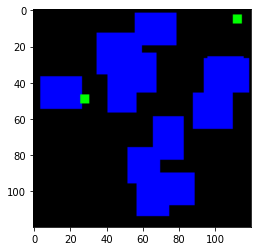

In [6]:
# generate test image
img = np.zeros((map_width, map_height, 3), np.uint8)

add_obstacles(img, rect_count, rect_min, rect_max)

start_x_pos, start_y_pos = create_start_point(img, map_size)
end_x_pos, end_y_pos = create_end_point(img, start_x_pos, start_y_pos, map_size, min_distance=90)

cv2_imshow(img)

In [7]:
project_path = get_abs_path(1)
results_path = project_path + '/data/maps/'

In [10]:
first_map_num = 0
last_map_num = 2000

for n in range(first_map_num, last_map_num):

  # generate image
  img = np.zeros((map_width, map_height, 3), np.uint8)

  # add obstacles
  add_obstacles(img, rect_count, rect_min, rect_max)

  # create start and end points
  start_x_pos, start_y_pos = create_start_point(img, map_size)
  end_x_pos, end_y_pos = create_end_point(img, start_x_pos, start_y_pos, map_size, min_distance=65)

  # create map
  map_name = 'map_'+str(n)+'.png'
  map_data = [map_name, str(start_x_pos), str(start_y_pos), str(end_x_pos), str(end_y_pos)]

  print(map_data)
  # cv2_imshow(img)

  # save image
  if not cv2.imwrite(results_path + map_name, img):
    raise Exception('Could not write image')

['map_0.png', '107', '55', '22', '115']
['map_1.png', '41', '51', '105', '7']
['map_2.png', '51', '17', '96', '75']
['map_3.png', '13', '100', '113', '81']
['map_4.png', '62', '27', '99', '112']
['map_5.png', '29', '79', '94', '55']
['map_6.png', '57', '50', '106', '116']
['map_7.png', '76', '31', '4', '80']
['map_8.png', '82', '53', '15', '60']
['map_9.png', '46', '51', '68', '113']
['map_10.png', '85', '114', '27', '13']
['map_11.png', '98', '96', '16', '92']
['map_12.png', '7', '60', '89', '113']
['map_13.png', '64', '112', '69', '21']
['map_14.png', '59', '30', '64', '105']
['map_15.png', '30', '77', '97', '6']
['map_16.png', '53', '9', '69', '73']
['map_17.png', '29', '54', '88', '86']
['map_18.png', '17', '13', '50', '73']
['map_19.png', '103', '104', '59', '43']
['map_20.png', '101', '7', '34', '12']
['map_21.png', '8', '97', '105', '43']
['map_22.png', '59', '81', '27', '7']
['map_23.png', '70', '73', '28', '23']
['map_24.png', '64', '5', '106', '56']
['map_25.png', '6', '59', 